In [1]:
import pandas as pd
df=pd.read_csv('C:/Users/praga/Documents/SQL/Final_Proj/Data_now.csv')
df.head()

,Id,Review
0,10,Room wasn't ready when promised. System didn't...
1,50,Location of the hotel was excellent an within ...
2,50,"Very nice property. The rooms are spacious, ni..."
3,50,The front desk staff at the hotel are so frien...
4,50,Lovely spacious room on the 25th Floor with a ...


In [22]:
import os
import re
from wordcloud import WordCloud

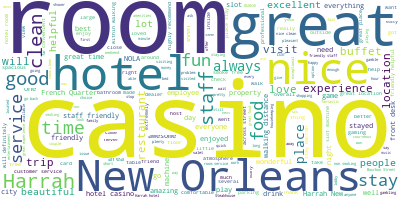

In [23]:
# Join the different processed titles together.
long_string = ','.join(list(df['Review'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [2]:
df=df.drop(['Id'], axis = 1)

In [3]:
df.head()

,Review
0,Room wasn't ready when promised. System didn't...
1,Location of the hotel was excellent an within ...
2,"Very nice property. The rooms are spacious, ni..."
3,The front desk staff at the hotel are so frien...
4,Lovely spacious room on the 25th Floor with a ...


In [4]:
import nltk
import re
import numpy as np
import pandas as pd
from pprint import pprint
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# NLTK Stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\praga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# Convert to list
data = df.Review.values.tolist()
# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

In [7]:
print(data[:1])

['Room wasnt ready when promised. System didnt send a receipt as promised. When I called and asked for a receipt, I was sent an unreadable file. When I complained, no one cared. Horrible customer service']


In [8]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['room', 'wasnt', 'ready', 'when', 'promised', 'system', 'didnt', 'send', 'receipt', 'as', 'promised', 'when', 'called', 'and', 'asked', 'for', 'receipt', 'was', 'sent', 'an', 'unreadable', 'file', 'when', 'complained', 'no', 'one', 'cared', 'horrible', 'customer', 'service']]


In [9]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['room', 'wasnt', 'ready', 'when', 'promised', 'system', 'didnt', 'send', 'receipt', 'as', 'promised', 'when', 'called', 'and', 'asked', 'for', 'receipt', 'was', 'sent', 'an', 'unreadable', 'file', 'when', 'complained', 'no', 'one', 'cared', 'horrible', 'customer', 'service']


In [10]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [11]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['room', 'ready', 'promise', 'system', 'send', 'receipt', 'promise', 'call', 'ask', 'receipt', 'send', 'unreadable', 'file', 'complain', 'cared', 'horrible', 'customer', 'service']]


In [12]:
data_lemmatized

[['room',
  'ready',
  'promise',
  'system',
  'send',
  'receipt',
  'promise',
  'call',
  'ask',
  'receipt',
  'send',
  'unreadable',
  'file',
  'complain',
  'cared',
  'horrible',
  'customer',
  'service'],
 ['location',
  'hotel',
  'excellent',
  'several',
  'way',
  'transportation',
  'trolley',
  'stop',
  'street',
  'ride',
  'day',
  'person',
  'hotel',
  'beautiful',
  'right',
  'outside',
  'hotel',
  'believe',
  'establishment',
  'own',
  'harrah',
  'restaurant',
  'bar',
  'great',
  'place',
  'sit',
  'dinner',
  'coffee',
  'drink',
  'night',
  'locate',
  'garage',
  'elevator',
  'thing',
  'hotel',
  'would',
  'pool',
  'casino',
  'many',
  'offering',
  'food',
  'drink',
  'comp',
  'room',
  'sure',
  'much',
  'hotel',
  'like',
  'diamond',
  'club',
  'work',
  'however',
  'really',
  'affect',
  'want',
  'experience',
  'culture',
  'food',
  'restaurant',
  'area'],
 ['nice',
  'property',
  'room',
  'spacious',
  'nicely',
  'decorate',


In [13]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 2), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1)]]


In [14]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('ask', 1),
  ('call', 1),
  ('cared', 1),
  ('complain', 1),
  ('customer', 1),
  ('file', 1),
  ('horrible', 1),
  ('promise', 2),
  ('ready', 1),
  ('receipt', 2),
  ('room', 1),
  ('send', 2),
  ('service', 1),
  ('system', 1),
  ('unreadable', 1)]]

In [15]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [16]:
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.055*"fun" + 0.039*"play" + 0.033*"table" + 0.028*"people" + 0.028*"game" + 0.027*"slot" + 0.019*"dealer" + 0.018*"win" + 0.017*"new" + 0.013*"make"'), (1, '0.041*"great" + 0.040*"casino" + 0.031*"room" + 0.026*"hotel" + 0.024*"staff" + 0.022*"time" + 0.022*"stay" + 0.022*"good" + 0.020*"harrah" + 0.019*"nice"'), (2, '0.032*"customer" + 0.018*"say" + 0.017*"ask" + 0.015*"check" + 0.015*"make" + 0.014*"leave" + 0.013*"professional" + 0.012*"care" + 0.011*"quick" + 0.011*"service"'), (3, '0.035*"parking" + 0.027*"minute" + 0.018*"music" + 0.017*"free" + 0.016*"player" + 0.015*"play" + 0.014*"guest" + 0.014*"get" + 0.014*"high" + 0.013*"bring"'), (4, '0.024*"locate" + 0.021*"street" + 0.015*"pleasant" + 0.013*"issue" + 0.011*"absolutely" + 0.011*"dining" + 0.011*"price" + 0.011*"access" + 0.010*"small" + 0.010*"like"')]


In [ ]:
# Join the different processed titles together.
long_string = ','.join(list(df['df_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [17]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\praga\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.367742  0.022178       1        1  66.625992
0     -0.058342 -0.283597       2        1  10.454957
2     -0.072902  0.151011       3        1  10.172585
4     -0.123492  0.115951       4        1   8.053563
3     -0.113006 -0.005543       5        1   4.692892, topic_info=     Category        Freq             Term       Total  loglift  logprob
term                                                                    
275   Default  132.000000              fun  132.000000  30.0000  30.0000
35    Default  632.000000            great  632.000000  29.0000  29.0000
252   Default  124.000000             play  124.000000  28.0000  28.0000
20    Default  620.000000           casino  620.000000  27.0000  27.0000
100   Default   67.000000          parking   67.000000  26.0000  26.0000
131   Default   81.000000            table   81.000000  25.0000  25.0000
4     Default   76.000000         customer   76.000000  24.0000  24.0000
146   Default   79.000000           people   79.000000  23.0000  23.0000
104   Default   77.000000             slot   77.000000  22.0000  22.0000
118   Default   73.000000             game   73.000000  21.0000  21.0000
92    Default  117.000000              get  117.000000  20.0000  20.0000
225   Default  141.000000             make  141.000000  19.0000  19.0000
279   Default   59.000000             free   59.000000  18.0000  18.0000
106   Default  367.000000            staff  367.000000  17.0000  17.0000
12    Default  221.000000          service  221.000000  16.0000  16.0000
255   Default  342.000000             stay  342.000000  15.0000  15.0000
93    Default  336.000000             good  336.000000  14.0000  14.0000
40    Default   45.000000           locate   45.000000  13.0000  13.0000
37    Default  411.000000            hotel  411.000000  12.0000  12.0000
10    Default  497.000000             room  497.000000  11.0000  11.0000
1060  Default   46.000000           dealer   46.000000  10.0000  10.0000
74    Default  300.000000             nice  300.000000   9.0000   9.0000
159   Default   54.000000            check   54.000000   8.0000   8.0000
68    Default  295.000000            clean  295.000000   7.0000   7.0000
58    Default   39.000000           street   39.000000   6.0000   6.0000
366   Default   43.000000              win   43.000000   5.0000   5.0000
91    Default  286.000000         friendly  286.000000   4.0000   4.0000
102   Default   42.000000              say   42.000000   3.0000   3.0000
413   Default   30.000000           minute   30.000000   2.0000   2.0000
0     Default   41.000000              ask   41.000000   1.0000   1.0000
...       ...         ...              ...         ...      ...      ...
877    Topic5    9.517194           ticket   10.229267   2.9870  -4.7340
1329   Topic5    8.590858          evening    9.304918   2.9793  -4.8364
740    Topic5    9.013038             cash    9.765268   2.9790  -4.7884
2193   Topic5    7.872886  professionalism    8.600263   2.9708  -4.9237
1791   Topic5    8.067406     disappointed    8.826792   2.9692  -4.8992
951    Topic5    7.821299         beverage    8.574444   2.9672  -4.9302
1218   Topic5    7.091753           handle    7.808613   2.9628  -5.0281
987    Topic5    6.683991         actually    7.404566   2.9567  -5.0874
784    Topic5    6.456680             park    7.168033   2.9546  -5.1220
2232   Topic5    6.513068          sweater    7.232977   2.9543  -5.1133
85     Topic5    6.253631         discount    6.971235   2.9505  -5.1539
1459   Topic5    6.271206        bartender    6.997046   2.9496  -5.1511
871    Topic5    6.137102             hear    6.877687   2.9452  -5.1727
1093   Topic5    5.378627            cajun    6.101367   2.9330  -5.3046
1569   Topic5    5.480188          loading    6.256816   2.9266  -5.2859
979    Topic5    5.294619        recognize    6.052458   2.9253  -5.3204
22

In [52]:
type(lda_model.print_topics())

list